In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch

# Assignment 3

## Image Classification Using RF and SVM

1. Resize the train/test images to 64 × 64 and compute HoG features using cells of 8×8 pixels, blocks of 4×4 cells and 4 bins. This should yeild a feature vector of size 1600 per image.
2. Fit a non-linear SVM classifier (use RBF kernel with gamma=‘auto’ and C=1) on the features and the class labels of the training images. 
3. Predict labels of the test images by feeding the test features to the trained classifier and calculate classification accuracy.
4. Tune values of hyperparameters ‘gamma’ and ‘C’ to achieve test accuracy greater than 25%.
5. Fit a Random Forest(RF) classifier (set n estimators=10, max depth=5 and criterion=‘entropy’) on the features and the class labels of the training images.
6. Predict labels of the test images by feeding the test features to the trained classifier and calculate classification accuracy.
7. Tune values of hyperparameters ‘n estimators’ and ‘max depth’ to achieve test accuracy greater than 25%. 
8. Compare results of SVM and RF classifiers. Which one provides better results? Experiment training both classifiers with a range of random stats and measure classification accuracy of the test set. Which classifier is more stable or robust to the change in random state? 

In [2]:
# load in the dataset
flower_subset = np.load("flower_subset.npz")
for file in flower_subset.files:
    print(file)
    print(type(flower_subset[file]))
    print(flower_subset[file])

train_images
<class 'numpy.ndarray'>
[[[0.18038522 0.18650429 0.19814645 ... 0.1564951  0.18027511 0.25166135]
  [0.18037684 0.18435968 0.18674939 ... 0.20179228 0.19784007 0.17727817]
  [0.18037684 0.17256123 0.17743566 ... 0.26024314 0.24134498 0.17493466]
  ...
  [0.24996529 0.31337316 0.30150625 ... 0.0510163  0.20882353 0.35993461]
  [0.29247855 0.39220282 0.35778497 ... 0.11902286 0.0799302  0.27358638]
  [0.3016154  0.33435418 0.34492547 ... 0.15343137 0.05093444 0.20127145]]

 [[0.22131396 0.20027765 0.21459674 ... 0.61139706 0.59301471 0.54416935]
  [0.21286765 0.21439951 0.23754021 ... 0.62969707 0.60082146 0.53716108]
  [0.22642272 0.23406863 0.25435049 ... 0.63878102 0.61697304 0.58944738]
  ...
  [0.36354167 0.18051662 0.21605967 ... 0.20655637 0.21472695 0.23878676]
  [0.30002872 0.23520795 0.24332108 ... 0.18823529 0.19607843 0.2       ]
  [0.30613703 0.22977941 0.2430013  ... 0.19694968 0.20214461 0.2       ]]

 [[0.03768167 0.04793845 0.06028957 ... 0.16594669 0.172549

In [3]:
# assign meaningful names to each set in the dataset
train_images = flower_subset["train_images"]
train_labels = flower_subset["train_labels"]
test_images = flower_subset["test_images"]
test_labels = flower_subset["test_labels"]

In [4]:
def display_single_image(img, name):
    """Display a single image nicely."""
    plt.figure(figsize=(20, 20))
    plt.subplot(111), plt.imshow(img, cmap="gray")
    plt.title(name), plt.xticks([]), plt.yticks([])
    plt.show()

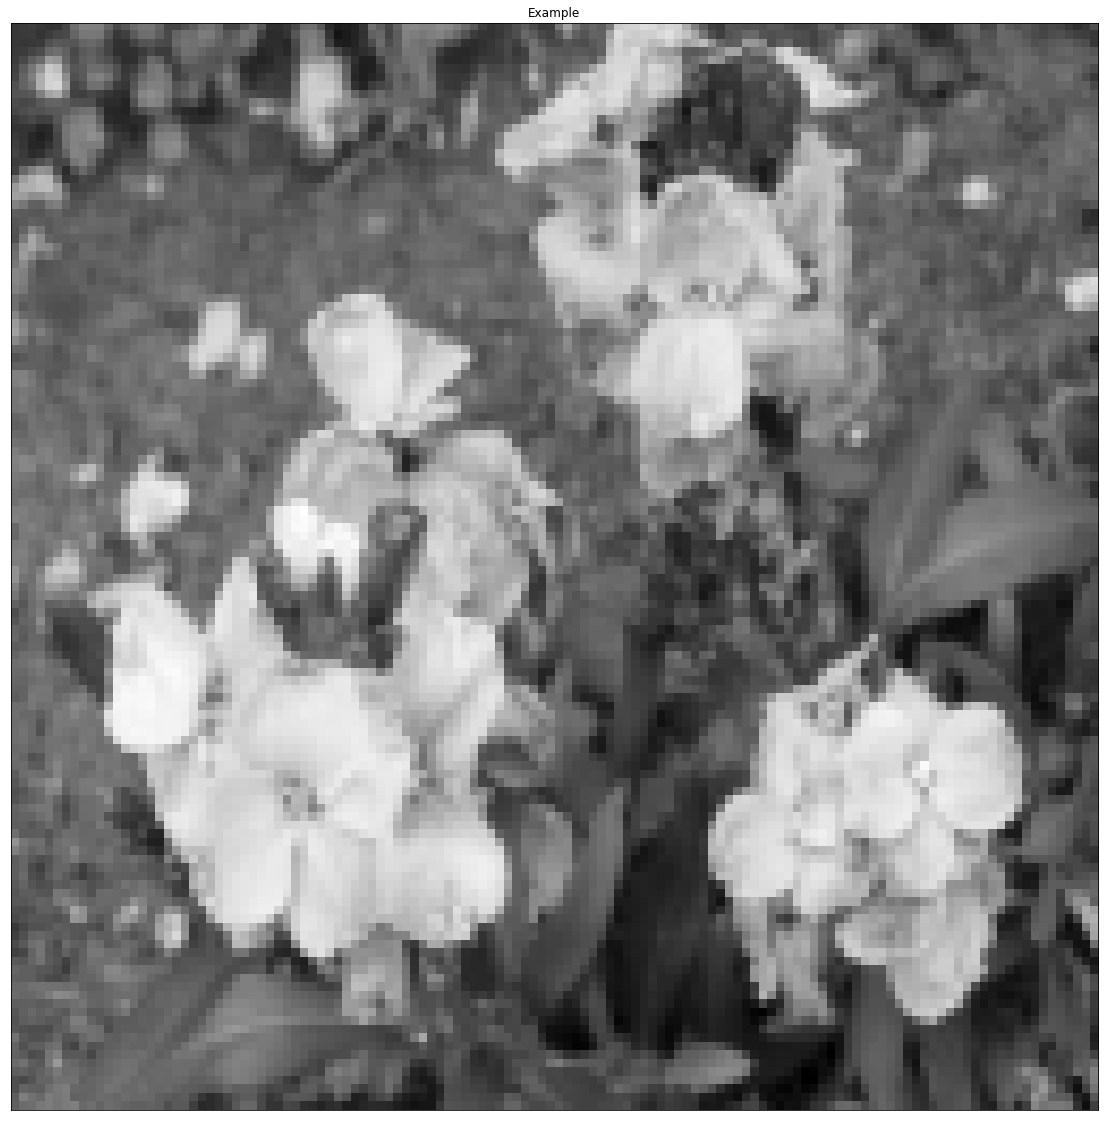

In [5]:
display_single_image(train_images[0], "Example")

In [6]:
def half_resolution(img):
    return cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5)

In [7]:
# resize to 64x64
train_images = np.array(list(map(half_resolution, train_images)))
test_images = np.array(list(map(half_resolution, test_images)))

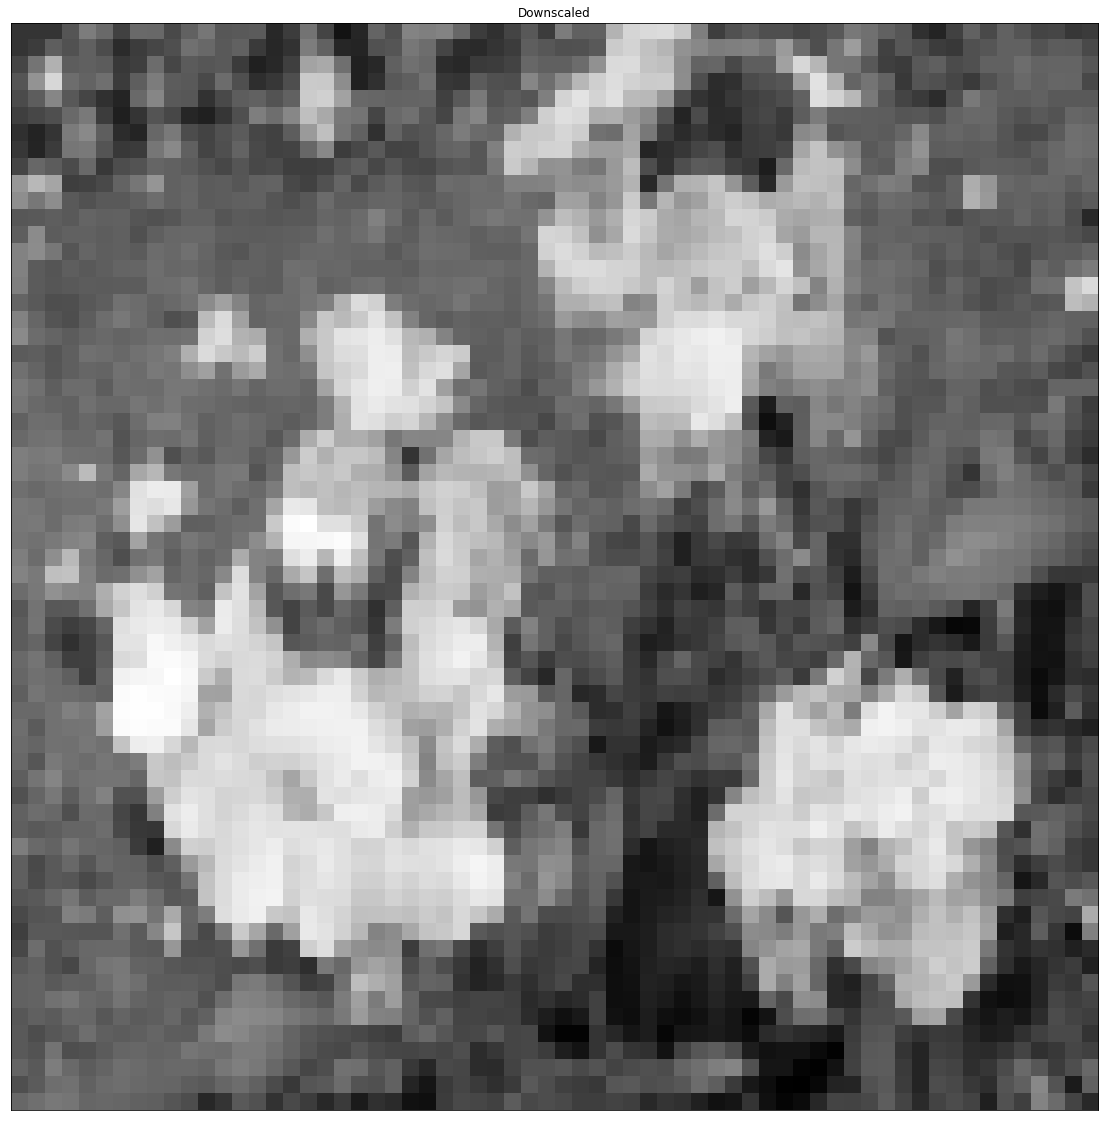

In [8]:
display_single_image(train_images[0], "Downscaled")

In [9]:
# create HoG Object
# winSize is the size of the image cropped to multiple of the cell size
# all arguments should be given in terms of number of pixels
IMG_SIZE = (64, 64) # h x w in pixels
CELL_SIZE = (8, 8)  # h x w in pixels
BLOCK_SIZE = (4, 4)  # h x w in cells
NBINS = 4

hog = cv2.HOGDescriptor(_winSize=(IMG_SIZE[1] // CELL_SIZE[1] * CELL_SIZE[1],
                                  IMG_SIZE[0] // CELL_SIZE[0] * CELL_SIZE[0]),
                        _blockSize=(BLOCK_SIZE[1] * CELL_SIZE[1],
                                    BLOCK_SIZE[0] * CELL_SIZE[0]),
                        _blockStride=(CELL_SIZE[1], CELL_SIZE[0]),
                        _cellSize=(CELL_SIZE[1], CELL_SIZE[0]),
                        _nbins=NBINS)

In [ ]:
# extract HoG features
features = []
for i in range(train_images.shape[0]):
    features.append(hog.compute(train_images[i].reshape(8,8).astype(np.uint8)).reshape(1, -1))
features = np.vstack(features)